In [2]:
import sys
sys.path.insert(0, '..')
from eda_import import *

In [3]:
df = pd.read_csv('../reference_data/target_genes_with_type.tsv', sep='\t')

In [4]:
df.head(2)

,Gene,Type
0,ABL1,ONC
1,AKT1,ONC


In [5]:
df.shape

(114, 2)

In [6]:
df.Type.value_counts().to_frame().T

,ONC,TSG,-
Type,51,48,15


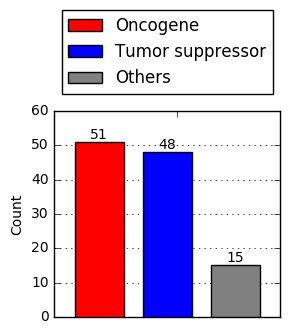

In [9]:
fig = plt.figure(figsize=(3, 2.5))
ax = fig.add_subplot(111)

df.Type.value_counts().to_frame().T\
    .rename(columns=dict(zip(['ONC', 'TSG', '-'], ['Oncogene', 'Tumor suppressor', 'Others'])))\
    .plot.bar(ax=ax, color=['red', 'blue', 'gray'], zorder=3)

ax.set_xticklabels([])
ax.set_xlim([-0.3, 0.3])
ax.yaxis.grid(zorder=0)
ax.get_xlim()
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.53))
ax.set_ylabel('Count')

orig_w = ax.patches[0].get_width()
orig_xlim = ax.get_xlim()
target_w = 0.12
for p in ax.patches:
    p.set_width(target_w)
    ax.text(p.get_x() + p.get_width()/2., p.get_height() + 0.02,
                '%d' % int(p.get_height()),
                ha='center', va='bottom')

ax.set_xlim(orig_xlim[0], orig_xlim[1] - (orig_w - target_w))

plt.tight_layout()
plt.savefig('../__results/figs/gene_distribution.png', bbox_inches = 'tight', dpi=200)